<a href="https://colab.research.google.com/github/webanetStorm/AI_webanet/blob/master/AI_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Пример 1.1.1.** Проведем кластеризацию K-средних к набору простых цифр. K-means
попытается идентифицировать похожие цифры

(1797, 64)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)


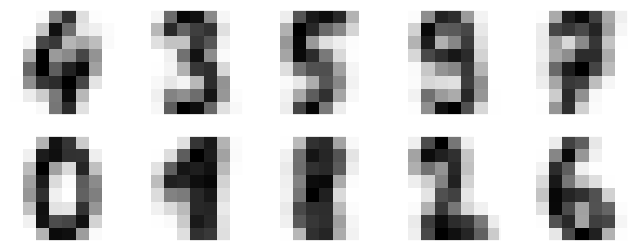

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.data.shape)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

**Задание 1.** Дан массив данных.Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = np.array([[5, 3], [10, 15], [15, 12], [24, 10], [30, 45], [85, 70], [71, 80], [60, 78], [55, 52], [80, 91]])

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    y_pred = kmeans.predict(X)
    score = silhouette_score(X, y_pred)
    print("Number of clusters:", k, "Silhouette score:", score)

Number of clusters: 2 Silhouette score: 0.6586004781412067
Number of clusters: 3 Silhouette score: 0.5846934528951507
Number of clusters: 4 Silhouette score: 0.44309360110626184
Number of clusters: 5 Silhouette score: 0.34217972929569107


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Задание 2.** Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = df[['sepal length (cm)', 'petal length (cm)']]

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    y_pred = kmeans.predict(X)
    score = silhouette_score(X, y_pred)
    print("Number of clusters:", k, "Silhouette score:", score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2 Silhouette score: 0.7097529826994816
Number of clusters: 3 Silhouette score: 0.5890584158017611
Number of clusters: 4 Silhouette score: 0.5645593160995663
Number of clusters: 5 Silhouette score: 0.5577931215347036


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Пример 1.1.2.** Построить дендрограмму для заданного массива данных

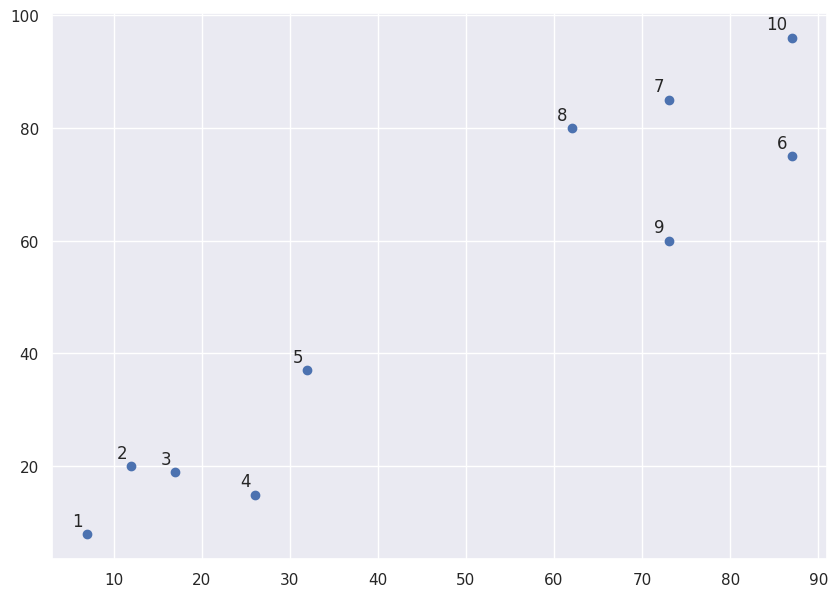

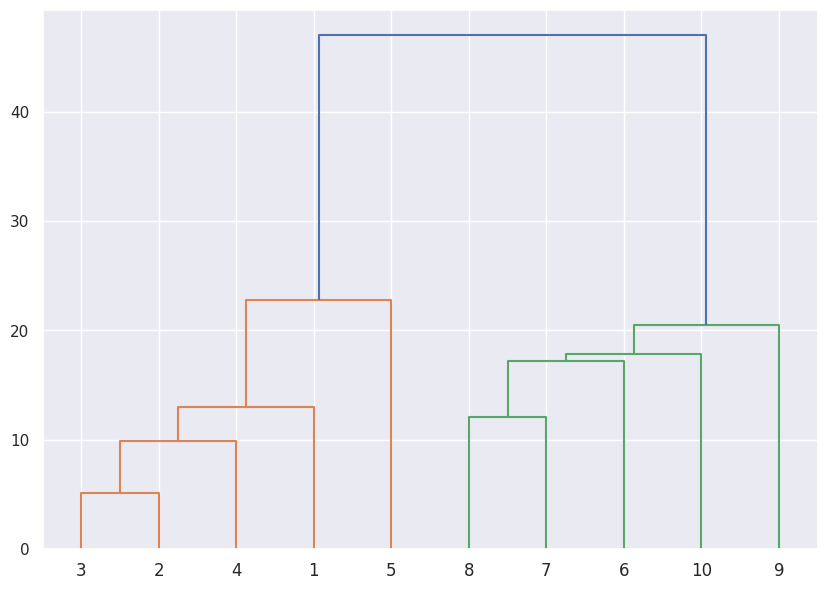

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


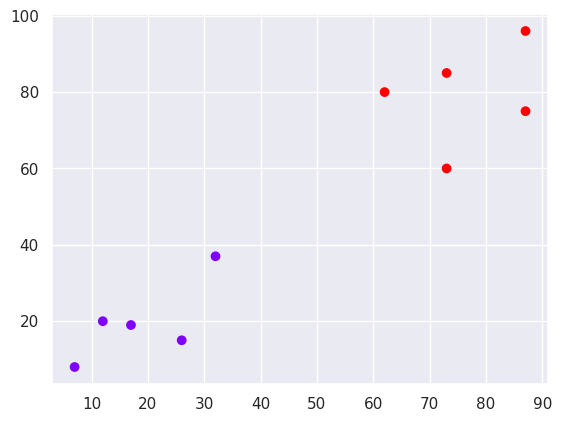

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = np.array([[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73, 85], [62, 80], [73, 60], [87, 96], ])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:, 0], X[:, 1], label="True Position")
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')

plt.show()

linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)

plt.show()

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='rainbow')

**Пример 1.1.3.** В этом примере мы выполним иерархическую кластеризацию реальных
данных и посмотрим, как ее можно использовать для решения реальной
проблемы. Выполним кластеризацию данных по набору
https://raw.githubusercontent.com/lucko515/clustering-
python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv
Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы
разделить клиентов на разные группы в зависимости от их покупательских
тенденций.

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


(200, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Figure size 5040x2160 with 0 Axes>

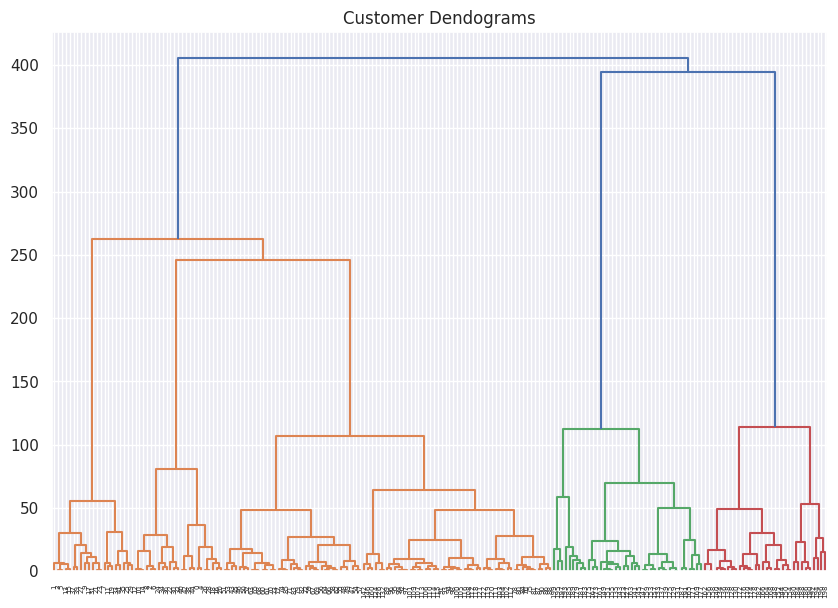

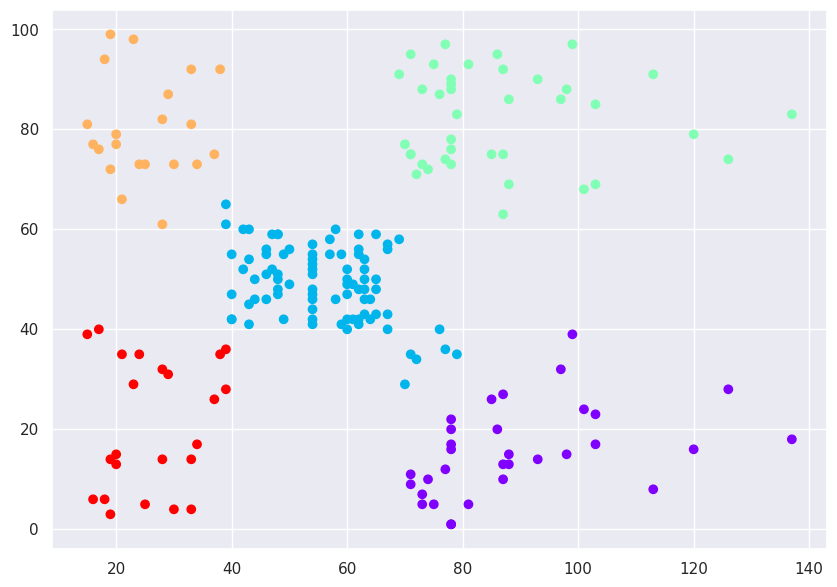

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

url = "https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv"

customer_data = pd.read_csv(url)
print(customer_data.head())
print("\n")
print(customer_data.shape)

data = customer_data.iloc[:, 3:5].values
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')

**Задание 3.** Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

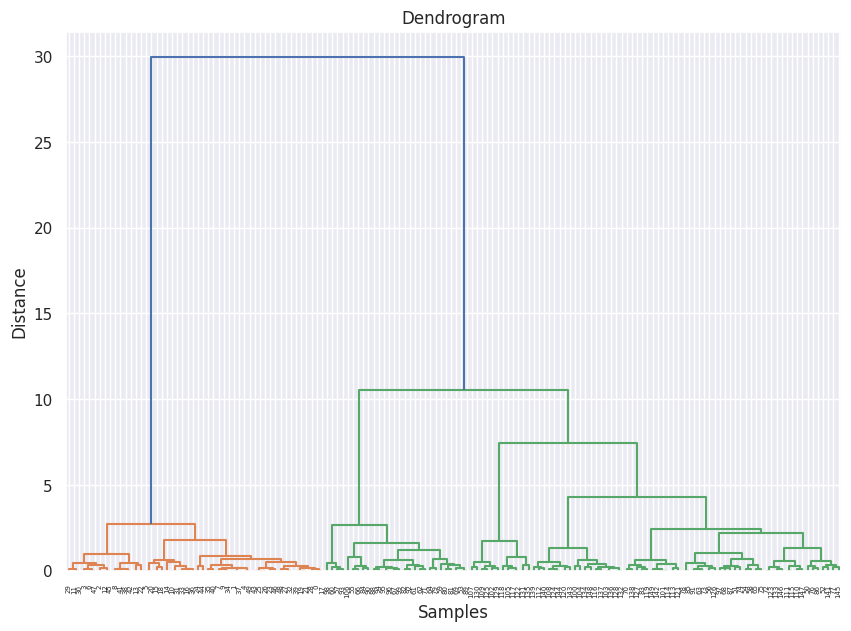

In [6]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = df[['sepal length (cm)', 'petal length (cm)']]
Z = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()